In [2]:
# pacotes
import pandas as pd
import numpy as np
import os
import openpyxl
from openpyxl import load_workbook
import seaborn as sn
from itertools import permutations, product
import matplotlib.pyplot as mplt
from tabulate import tabulate
from scipy.stats import chi2_contingency

In [3]:
# setar diretorio dos cadernos
diretorio = r'C:\Users\Computadores Gamer\OneDrive\Área de Trabalho\dados gradilene\dados'
diretorio = diretorio.replace('\\', '/')

os.chdir(diretorio)
os.getcwd()

'C:\\Users\\Computadores Gamer\\OneDrive\\Área de Trabalho\\dados gradilene\\dados'

In [4]:
#### DOMICILIO
# largura do txt
larguras = [2,4,1,9,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,2,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,14,14,1]

# nome das colunas
colunas = ["UF", "ESTRATO_POF", "TIPO_SITUACAO_REG",
            "COD_UPA", "NUM_DOM", "V0201", "V0202",
            "V0203", "V0204", "V0205", "V0206", "V0207",
            "V0208", "V0209", "V02101", "V02102",
            "V02103", "V02104", "V02105", "V02111",
            "V02112", "V02113", "V0212", "V0213",
            "V02141", "V02142", "V0215", "V02161",
            "V02162", "V02163", "V02164", "V0217",
            "V0219", "V0220", "V0221", "PESO",
            "PESO_FINAL", "V6199"]

# leitura dos dados
DOMICILIO = pd.read_fwf(
    os.path.join(diretorio, "DOMICILIO.txt"),
    widths=larguras,
    na_values=[" "],
    names=colunas,
    decimal="."
)

print(DOMICILIO.head())



   UF  ESTRATO_POF  TIPO_SITUACAO_REG    COD_UPA  NUM_DOM  V0201  V0202  \
0  11         1103                  1  110005400        1      1      1   
1  11         1103                  1  110005400        2      1      1   
2  11         1103                  1  110005400        4      1      4   
3  11         1103                  1  110005400        5      1      4   
4  11         1103                  1  110005400        6      1      1   

   V0203  V0204  V0205  ...  V02162  V02163  V02164  V0217  V0219  V0220  \
0      1      1     10  ...       2       1       2      1    NaN      1   
1      1      1      5  ...       2       1       2      3    1.0      1   
2      1      1      5  ...       2       2       2      1    NaN      1   
3      1      1      7  ...       2       2       2      1    NaN      2   
4      1      1      6  ...       2       2       2      1    NaN      1   

   V0221        PESO  PESO_FINAL  V6199  
0      1  272.806669  372.984516      1  
1      1

In [5]:
##### CONDICOES_VIDA
# largura do txt
larguras = [2,4,1,9,2,1,2,1,6,5,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,14,14,10]

# nome das colunas
colunas = ["UF", "ESTRATO_POF", "TIPO_SITUACAO_REG",
            "COD_UPA", "NUM_DOM", "NUM_UC", "COD_INFORMANTE",
            "V6101", "V6102", "V6103", "V61041", "V61042",
            "V61043", "V61044", "V61045", "V61046",
            "V61051", "V61052", "V61053", "V61054",
            "V61055", "V61056", "V61057", "V61058",
            "V61061", "V61062", "V61063", "V61064",
            "V61065", "V61066", "V61067", "V61068",
            "V61069", "V610610", "V610611", "V61071",
            "V61072", "V61073", "V6108", "V6109",
            "V6110", "V6111", "V6112", "V6113", "V6114",
            "V6115", "V6116", "V6117", "V6118", "V6119",
            "V6120", "V6121", "PESO", "PESO_FINAL",
            "RENDA_TOTAL"]

# leitura dos dados
CONDICOES_VIDA = pd.read_fwf(
    os.path.join(diretorio, "CONDICOES_VIDA.txt"),
    widths=larguras,
    na_values=[" "],
    names=colunas,
    decimal="."
)

print(CONDICOES_VIDA.head())


   UF  ESTRATO_POF  TIPO_SITUACAO_REG    COD_UPA  NUM_DOM  NUM_UC  \
0  11         1103                  1  110005400        1       1   
1  11         1103                  1  110005400        2       1   
2  11         1103                  1  110005400        4       1   
3  11         1103                  1  110005400        5       1   
4  11         1103                  1  110005400        6       1   

   COD_INFORMANTE  V6101  V6102  V6103  ...  V6115  V6116  V6117  V6118  \
0               1      5   4000   1500  ...    NaN    NaN    NaN    NaN   
1               1      3   3500   1000  ...    NaN    NaN    NaN    NaN   
2               1      5   5000   1200  ...    NaN    NaN    NaN    NaN   
3               1      3   1800    800  ...    NaN    NaN    NaN    NaN   
4               1      5   6000   1500  ...    NaN    NaN    NaN    NaN   

   V6119  V6120  V6121        PESO  PESO_FINAL  RENDA_TOTAL  
0    NaN    NaN    NaN  272.806669  372.984516     11254.75  
1    NaN  

In [6]:
##### MORADOR_QUALI_VIDA
# largura do txt
larguras = [2,4,1,9,2,1,2,20,20,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,1,2,20,20,14,14]

# nome das colunas
colunas = ["UF","ESTRATO_POF","TIPO_SITUACAO_REG","COD_UPA",
            "NUM_DOM","NUM_UC","COD_INFORMANTE","CONTAGEM_PONDERADA",
            "FUNCAO_PERDA","V201","V202","V204","V205","V206",
            "V207","V208","V209","V210","V211","V212","V214","V215",
            "V216","V217","V301","V302","V303","V304","V305","V306",
            "V307","V308","V401","V402","V403","V501","V502","V503",
            "V504","V505","V506","V601","V602","V603","V604","V605",
            "V606","V607","V608","V609","V610","V611","V701","V702",
            "V703","V704","V801","V802","V901","V902","GRANDE_REGIAO",
            "C1","C2","C3","C4","C5","C6","C7","RENDA_DISP_PC",
            "RENDA_DISP_PC_SS","PESO","PESO_FINAL"]

# leitura dos dados
MORADOR_QUALI_VIDA = pd.read_fwf(
    os.path.join(diretorio, "MORADOR_QUALI_VIDA.txt"),
    widths=larguras,
    na_values=[" "],
    names=colunas,
    decimal="."
)

print(MORADOR_QUALI_VIDA.head())

   UF  ESTRATO_POF  TIPO_SITUACAO_REG    COD_UPA  NUM_DOM  NUM_UC  \
0  11         1103                  1  110005400        1       1   
1  11         1103                  1  110005400        1       1   
2  11         1103                  1  110005400        1       1   
3  11         1103                  1  110005400        1       1   
4  11         1103                  1  110005400        2       1   

   COD_INFORMANTE  CONTAGEM_PONDERADA  FUNCAO_PERDA  V201  ...  C2  C3  C4  \
0               1            0.177778      0.113229     0  ...   1   2   7   
1               2            0.177778      0.113229     0  ...   1   2   7   
2               3            0.177778      0.113229     0  ...   1   2   7   
3               4            0.177778      0.113229     0  ...   1   2   7   
4               1            0.300000      0.203610     0  ...   1   2   5   

   C5  C6  C7  RENDA_DISP_PC  RENDA_DISP_PC_SS        PESO  PESO_FINAL  
0   5   3   9    2488.984375       2383.936

In [7]:
#### MORADOR
# largura do txt
larguras = [2,4,1,9,2,1,2,2,1,2,2,4,3,1,1,
            1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,2,1,1,2,1,1,2,1,1,1,
            2,1,2,14,14,10,1,20,20,20,20]

# nome das colunas
colunas = ["UF", "ESTRATO_POF", "TIPO_SITUACAO_REG",
            "COD_UPA", "NUM_DOM", "NUM_UC", "COD_INFORMANTE",
            "V0306", "V0401", "V04021", "V04022", "V04023",
            "V0403", "V0404", "V0405", "V0406", "V0407",
            "V0408", "V0409", "V0410", "V0411", "V0412",
            "V0413", "V0414", "V0415", "V0416",
            "V041711", "V041712", "V041721", "V041722",
            "V041731", "V041732", "V041741", "V041742",
            "V0418", "V0419", "V0420", "V0421", "V0422",
            "V0423", "V0424", "V0425", "V0426", "V0427",
            "V0428", "V0429", "V0430", "ANOS_ESTUDO",
            "PESO", "PESO_FINAL", "RENDA_TOTAL",
            "NIVEL_INSTRUCAO", "RENDA_DISP_PC","RENDA_MONET_PC",
            "RENDA_NAO_MONET_PC","DEDUCAO_PC" ]

# leitura dos dados
MORADOR = pd.read_fwf(
    os.path.join(diretorio, "MORADOR.txt"),
    widths=larguras,
    na_values=[" "],
    names=colunas,
    decimal="."
)

print(MORADOR.head())


   UF  ESTRATO_POF  TIPO_SITUACAO_REG    COD_UPA  NUM_DOM  NUM_UC  \
0  11         1101                  1  110000016        2       1   
1  11         1101                  1  110000016        2       1   
2  11         1101                  1  110000016        2       1   
3  11         1101                  1  110000016        3       1   
4  11         1101                  1  110000016        3       1   

   COD_INFORMANTE  V0306  V0401  V04021  ...  V0430  ANOS_ESTUDO        PESO  \
0               1      1      1      15  ...    2.0            5  449.911506   
1               2      2      1       1  ...    2.0            6  449.911506   
2               3      6      1      16  ...    1.0           12  449.911506   
3               1      1      1       4  ...    1.0           12  449.911506   
4               2      2      1       7  ...    2.0            6  449.911506   

   PESO_FINAL  RENDA_TOTAL  NIVEL_INSTRUCAO  RENDA_DISP_PC  RENDA_MONET_PC  \
0  690.883738      3855.34

In [8]:
#### Merges
bigdata = pd.merge(DOMICILIO, MORADOR, on = ['UF', 'ESTRATO_POF', 'TIPO_SITUACAO_REG','COD_UPA', 'NUM_DOM'], how= 'left')
bigdata2 = pd.merge(CONDICOES_VIDA, bigdata, on = ['UF', 'ESTRATO_POF', 'TIPO_SITUACAO_REG','COD_UPA', 'NUM_DOM'], how='right')
base = pd.merge(MORADOR_QUALI_VIDA, bigdata2, on = ['UF', 'ESTRATO_POF', 'TIPO_SITUACAO_REG','COD_UPA', 'NUM_DOM'], how='right')


# removendo colunas duplicadas, ou seja, com sufixo '_x' e '_y'
colunas_delx = base.filter(regex=f'_x$').columns
base = base.drop(colunas_delx, axis=1)

colunas_dely = base.filter(regex=f'_y$').columns
base = base.drop(colunas_dely, axis=1)

C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_12676\2152330528.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'PESO_FINAL_y', 'PESO_y'} in the result is deprecated and will raise a MergeError in a future version.
  base = pd.merge(MORADOR_QUALI_VIDA, bigdata2, on = ['UF', 'ESTRATO_POF', 'TIPO_SITUACAO_REG','COD_UPA', 'NUM_DOM'], how='right')


In [9]:
# var_depend1
# MORADOR['RENDA_MONET_PC']
# menor ou igual a 1/4 de SM = pobre
# acima de 1/4 de SM = não pobre
# SM (2017) = 937 


corte_sm = 937/4

base['var_depend1'] = pd.Series()

for i in range(len(base['RENDA_MONET_PC'])):
    if base['RENDA_MONET_PC'][i] <= corte_sm:
        base['var_depend1'][i] = 'pobre'
    else:
        base['var_depend1'][i] = 'não pobre'
        

# grafico1 = sn.countplot(base, x='var_depend1')
# porcentagem_pobre = base['var_depend1'].value_counts()['pobre']/len(base['var_depend1'])
# porcentagem_naopobre = 1 - porcentagem_pobre
# print(base['var_depend1'].value_counts(), f'% pobre:{porcentagem_pobre}', f'% nao pobre:{porcentagem_naopobre}') 
        
    

C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_12676\876777828.py:10: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  base['var_depend1'] = pd.Series()
C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_12676\876777828.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['var_depend1'][i] = 'não pobre'


In [10]:
# var_depend2 
# DOMICILIO['V6199']
# 1 – Segurança = não pobre
# 2 – Insegurança leve = pobre
# 3 – Insegurança moderada = pobre
# 4 – Insegurança grave = pobre


base['var_depend2'] = pd.Series()

for i in range(len(base['V6199'])):
    if base['V6199'][i] == 1:
        base['var_depend2'][i] = 'não pobre'
    elif base['V6199'][i]==2:
        base['var_depend2'][i] = 'pobre'
    elif base['V6199'][i]==3:
        base['var_depend2'][i] = 'pobre'
    elif base['V6199'][i]==4:
        base['var_depend2'][i] = 'pobre'
    

# grafico2 = sn.countplot(base, x='var_depend2')
# porcentagem_pobre = base['var_depend2'].value_counts()['pobre']/len(base['var_depend2'])
# porcentagem_naopobre = 1 - porcentagem_pobre
# print(base['var_depend2'].value_counts(), f'% pobre:{porcentagem_pobre}', f'% nao pobre:{porcentagem_naopobre}')

C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_12676\2501125028.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  base['var_depend2'] = pd.Series()
C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_12676\2501125028.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['var_depend2'][i] = 'não pobre'


In [11]:
# var_depend3.1_inicial
# CONDICOES_VIDA['V6101']
# 1 – Muita dificuldade = pobre
# 2 – Dificuldade = pobre
# 3 – Alguma dificuldade = não pobre
# 4 – Alguma facilidade = não pobre
# 5 – Facilidade = não pobre
# 6 – Muita facilidade = não pobre


base['var_depend3.1_inicial'] = pd.Series()

for i in range(len(base['UF'])):
    if base['V6101'][i] == 1:
        base['var_depend3.1_inicial'][i] = 'pobre'
    elif base['V6101'][i]==2:
        base['var_depend3.1_inicial'][i]  = 'pobre'
    elif base['V6101'][i]==3:
        base['var_depend3.1_inicial'][i]  = 'não pobre'
    elif base['V6101'][i]==4:
        base['var_depend3.1_inicial'][i]  = 'não pobre'
    elif base['V6101'][i]==5:
        base['var_depend3.1_inicial'][i]  = 'não pobre'
    elif base['V6101'][i]==6:
        base['var_depend3.1_inicial'][i]  = 'não pobre'
    
 
# sn.countplot(CONDICOES_VIDA, x='var_depend3.1_inicial')
# print(CONDICOES_VIDA['var_depend3.1_inicial'].value_counts())

C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_12676\645433427.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  base['var_depend3.1_inicial'] = pd.Series()
C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_12676\645433427.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['var_depend3.1_inicial'][i]  = 'não pobre'


In [12]:
# var_depend3.2_inicial
# CONDICOES_VIDA['V61041']
# 1 - Bom = não pobre
# 2 - Satisfatório = não pobre
# 3 - Ruim = pobre



base['var_depend3.2_inicial'] = pd.Series()

for i in range(len(base['UF'])):
    if base['V61041'][i] == 1:
        base['var_depend3.2_inicial'][i] = 'não pobre'
    elif base['V61041'][i]==2:
        base['var_depend3.2_inicial'][i]  = 'não pobre'
    elif base['V61041'][i]==3:
        base['var_depend3.2_inicial'][i]  = 'pobre'

    
 
# sn.countplot(base, x='var_depend3.2_inicial')
# print(base['var_depend3.2_inicial'].value_counts())

C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_12676\627619585.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  base['var_depend3.2_inicial'] = pd.Series()
C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_12676\627619585.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['var_depend3.2_inicial'][i] = 'não pobre'


In [44]:
# var_depend4.1_inicial
# DOMICILIO['V0212']
# 1 – Rede geral, rede pluvial ou fossa ligada à rede = não pobre
# 2 – Fossa não ligada à rede = pobre
# 3 – Vala = pobre
# 4 – Rio, lago ou mar = pobre
# 5 – Outra forma = pobre

base['var_depend4.1_inicial'] = pd.Series()

for i in range(len(base['UF'])):
    if base['V0212'][i] == 1:
        base['var_depend4.1_inicial'][i] = 'não pobre'
    elif base['V0212'][i]==2:
        base['var_depend4.1_inicial'][i]  = 'pobre'
    elif base['V0212'][i]==3:
        base['var_depend4.1_inicial'][i]  = 'pobre'
    elif base['V0212'][i]==4:
        base['var_depend4.1_inicial'][i]  = 'pobre'
    elif base['V0212'][i]==5:
        base['var_depend4.1_inicial'][i]  = 'pobre'

  
 
# sn.countplot(DOMICILIO, x='var_depend4.1_inicial')
# print(DOMICILIO['var_depend4.1_inicial'].value_counts())

C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_12676\1249210345.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  base['var_depend4.1_inicial'] = pd.Series()
C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_12676\1249210345.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['var_depend4.1_inicial'][i]  = 'pobre'


In [14]:
# var_depend4.2_inicial
# DOMICILIO['V0213']
# 1 – Coletado diretamente por serviço de limpeza = não pobre
# 2 – Coletado em caçamba de serviço de limpeza = não pobre
# 3 – Queimado (na propriedade) = pobre
# 4 – Enterrado (na propriedade) = pobre
# 5 – Jogado em terreno baldio ou logradouro = pobre
# 6 – Outro destino = pobre


base['var_depend4.2_inicial'] = pd.Series()

for i in range(len(base['V6199'])):
    if base['V0213'][i] == 1:
        base['var_depend4.2_inicial'][i] = 'não pobre'
    elif base['V0213'][i]==2:
        base['var_depend4.2_inicial'][i]  = 'pobre'
    elif base['V0213'][i]==3:
        base['var_depend4.2_inicial'][i]  = 'pobre'
    elif base['V0213'][i]==4:
        base['var_depend4.2_inicial'][i]  = 'pobre'
    elif base['V0213'][i]==5:
        base['var_depend4.2_inicial'][i]  = 'pobre'
    elif base['V0213'][i]==6:
        base['var_depend4.2_inicial'][i]  = 'pobre'

    
 
# sn.countplot(DOMICILIO, x='var_depend4.2_inicial')
# print(DOMICILIO['var_depend4.2_inicial'].value_counts())

C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_12676\413874391.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  base['var_depend4.2_inicial'] = pd.Series()
C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_12676\413874391.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['var_depend4.2_inicial'][i] = 'não pobre'


In [15]:
# var_depend4.3_inicial
# DOMICILIO['V0220']
# 1 – Sim = não pobre
# 2 – Não = pobre

base['var_depend4.3_inicial'] = pd.Series()

for i in range(len(base['V6199'])):
    if base['V0220'][i] == 1:
        base['var_depend4.3_inicial'][i] = 'não pobre'
    elif base['V0220'][i]==2:
        base['var_depend4.3_inicial'][i]  = 'pobre'
    
 
# sn.countplot(DOMICILIO, x='var_depend4.3_inicial')
# print(DOMICILIO['var_depend4.3_inicial'].value_counts())

C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_12676\584730984.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  base['var_depend4.3_inicial'] = pd.Series()
C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_12676\584730984.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['var_depend4.3_inicial'][i] = 'não pobre'


[('não pobre', 'não pobre'), ('não pobre', 'pobre'), ('pobre', 'não pobre'), ('pobre', 'pobre')]


C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_12676\3590065714.py:23: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  base['var_depend3'] = pd.Series()
C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_12676\3590065714.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['var_depend3'][i] = 'não pobre'


não pobre    410900
pobre        282860
Name: var_depend3, dtype: int64


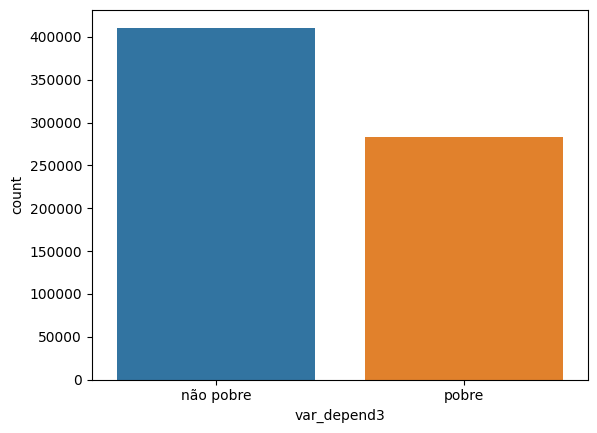

In [16]:
# score variavel dependente do grupo 3
# 3
# Pontuação:
# 0 - não pobre
# 1 - pobre
# 2 - pobre


# gerando permutações 3
lista = ['não pobre', 'pobre']
permutas_3 = []

for i in product(lista, repeat=2):
    permutas_3.append(i)
print(permutas_3)

# [('não pobre', 'não pobre') = 0
# ('não pobre', 'pobre') = 1
# ('pobre', 'não pobre') = 1
# ('pobre', 'pobre')] = 2

   
base['var_depend3'] = pd.Series()
for i in range(len(base['UF'])):
    if base['var_depend3.1_inicial'][i] =='não pobre' and base['var_depend3.2_inicial'][i] == 'não pobre':
        base['var_depend3'][i] = 'não pobre'
        
    elif base['var_depend3.1_inicial'][i] =='pobre' and base['var_depend3.2_inicial'][i] == 'pobre':
        base['var_depend3'][i]  = 'pobre'
    
    else:
        base['var_depend3'][i]  = 'pobre'

 
grafico3 = sn.countplot(base, x='var_depend3')
print(base['var_depend3'].value_counts())


In [36]:
# score variavel dependente do grupo 4
# Pontuação:
# 0 - não pobre
# 1 - não pobre
# 2 - pobre
# 3 - pobre


# gerando permutações 4    
lista = ['não pobre', 'pobre']
permutas_4 = []

for i in product(lista, repeat=3):
    permutas_4.append(i)
print(permutas_4)
    
# ('não pobre', 'não pobre', 'não pobre') = não pobre
# ('não pobre', 'não pobre', 'pobre') = não pobre
# ('não pobre', 'pobre', 'não pobre') = não pobre
# ('não pobre', 'pobre', 'pobre') = pobre
# ('pobre', 'não pobre', 'não pobre') = não pobre
# ('pobre', 'não pobre', 'pobre') = pobre
# ('pobre', 'pobre', 'não pobre') = pobre
# ('pobre', 'pobre', 'pobre') = pobre


base['var_depend4'] = pd.Series()

for i in range(len(base['V6199'])):
    if base['var_depend4.1_inicial'][i]=='não pobre' and base['var_depend4.2_inicial'][i]=='não pobre' and base['var_depend4.3_inicial'][i]=='não pobre':
        base['var_depend4'][i]='não pobre'
        
    elif base['var_depend4.1_inicial'][i]=='não pobre' and base['var_depend4.2_inicial'][i]=='não pobre' and base['var_depend4.3_inicial'][i]=='pobre':
        base['var_depend4'][i]='não pobre'
    
    elif base['var_depend4.1_inicial'][i]=='não pobre' and base['var_depend4.2_inicial'][i]=='pobre' and base['var_depend4.3_inicial'][i]=='não pobre':
        base['var_depend4'][i]='não pobre'
        
    elif base['var_depend4.1_inicial'][i]=='não pobre' and base['var_depend4.2_inicial'][i]=='pobre' and base['var_depend4.3_inicial'][i]=='pobre':
        base['var_depend4'][i]='pobre'
        
    elif base['var_depend4.1_inicial'][i]=='pobre' and base['var_depend4.2_inicial'][i]=='não pobre' and base['var_depend4.3_inicial'][i]=='não pobre':
        base['var_depend4'][i]='não pobre'
        
    elif base['var_depend4.1_inicial'][i]=='pobre' and base['var_depend4.2_inicial'][i]=='não pobre' and base['var_depend4.3_inicial'][i]=='pobre':
        base['var_depend4'][i]='pobre'
        
    elif base['var_depend4.1_inicial'][i]=='pobre' and base['var_depend4.2_inicial'][i]=='pobre' and base['var_depend4.3_inicial'][i]=='não pobre':
        base['var_depend4'][i]='pobre'
        
    elif base['var_depend4.1_inicial'][i]=='pobre' and base['var_depend4.2_inicial'][i]=='pobre' and base['var_depend4.3_inicial'][i]=='pobre':
        base['var_depend4'][i]='pobre'
        

    
# grafico4 = sn.countplot(DOMICILIO, x = 'var_depend4')
# print(DOMICILIO['var_depend4'].value_counts())




[('não pobre', 'não pobre', 'não pobre'), ('não pobre', 'não pobre', 'pobre'), ('não pobre', 'pobre', 'não pobre'), ('não pobre', 'pobre', 'pobre'), ('pobre', 'não pobre', 'não pobre'), ('pobre', 'não pobre', 'pobre'), ('pobre', 'pobre', 'não pobre'), ('pobre', 'pobre', 'pobre')]


C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_12676\36667485.py:27: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  base['var_depend4'] = pd.Series()
C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_12676\36667485.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['var_depend4'][i]='não pobre'


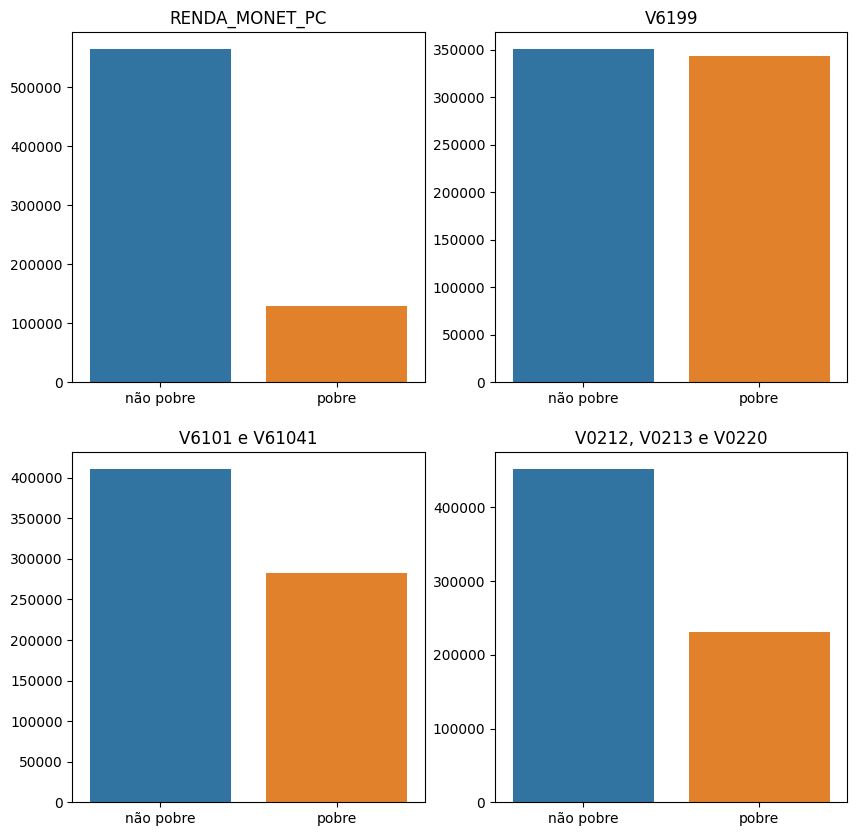

In [34]:
# grid das 4 variaveis
# plano
fig, eixos = mplt.subplots (2, 2, figsize=(10,10) )

# grafico1 = sn.countplot(MORADOR, x = 'var_depend1')
sn.countplot(base, x='var_depend1', ax=eixos[0,0])
eixos[0,0].set_title('RENDA_MONET_PC')
eixos[0,0].set_xlabel('')
eixos[0,0].set_ylabel('')

# grafico2 = sn.countplot(DOMICILIO, x = 'var_depend2')
sn.countplot(base, x = 'var_depend2', ax=eixos[0,1])
eixos[0,1].set_title('V6199')
eixos[0,1].set_xlabel('')
eixos[0,1].set_ylabel('')

# grafico3 = sn.countplot(CONDICOES_VIDA, x = 'var_depend3')
sn.countplot(base, x = 'var_depend3', ax= eixos[1,0])
eixos[1,0].set_title('V6101 e V61041')
eixos[1,0].set_xlabel('')
eixos[1,0].set_ylabel('')

# grafico4 = sn.countplot(DOMICILIO, x = 'var_depend4')
sn.countplot(base, x = 'var_depend4', ax= eixos[1,1])
eixos[1,1].set_title('V0212, V0213 e V0220')
eixos[1,1].set_xlabel('')
eixos[1,1].set_ylabel('')

mplt.show()

In [19]:
# # mapeando variaveis dependentes
# # 'não pobre' = 0
# # 'pobre' = 1
# base['var_depend1'] = base['var_depend1'].map({'não pobre':'0', 'pobre':'1'}).astype(int)
# base['var_depend2'] = base['var_depend2'].map({'não pobre':'0', 'pobre':'1'}).astype(int)
# base['var_depend3'] = base['var_depend3'].map({'não pobre':'0', 'pobre':'1'}).astype(int)
# base['var_depend4'] = base['var_depend4'].map({'não pobre':'0', 'pobre':'1'}).astype(int)

# conferir excel
# base_excel = base[['var_depend1','var_depend2','var_depend3.1_inicial','var_depend3.2_inicial','var_depend3','var_depend4.1_inicial', 'var_depend4.2_inicial','var_depend4.2_inicial', 'var_depend4']]
# base_excel.to_excel('base_teste.xlsx')

In [20]:
# variaveis indepentendes que serão usadas para estatisticas descritivas
# MORADOR = UF, RENDA_MONET_PC
# DOMICILIO = UF, V0212,V0213,V0220,V6199
# CONDICOES_VIDA = UF, V6101, V61041
# MORADOR_QUALI_VIDA = UF, TIPO_SITUACAO_REG,GRANDE_REGIAO,C1,C2,C3,C4

estat_morador = MORADOR[['RENDA_MONET_PC']].describe().round(2)
# estat_domicilio = DOMICILIO[['V0212','V0213','V0220','V6199']].value_counts()
# estat_condicoes_vida = CONDICOES_VIDA[['V6101','V61041']].describe().round(2)
# estat_morador_quali = MORADOR_QUALI_VIDA[['C1','C2','C3','C4']].describe().round(2)


tabela_estat = tabulate({
    "MORADOR": [estat_morador.to_string()],
    # "DOMICILIO": [estat_domicilio.to_string()],
    # "CONDICOES_VIDA": [estat_condicoes_vida.to_string()],
    # "MORADOR_QUALI_VIDA": [estat_morador_quali.to_string()]
}, headers="keys", tablefmt="grid")


print(tabela_estat)

+-----------------------+
| MORADOR               |
+=======================+
| RENDA_MONET_PC        |
| count       178369.00 |
| mean          1192.80 |
| std           2022.07 |
| min              0.00 |
| 25%            360.09 |
| 50%            709.80 |
| 75%           1300.01 |
| max         238281.15 |
+-----------------------+


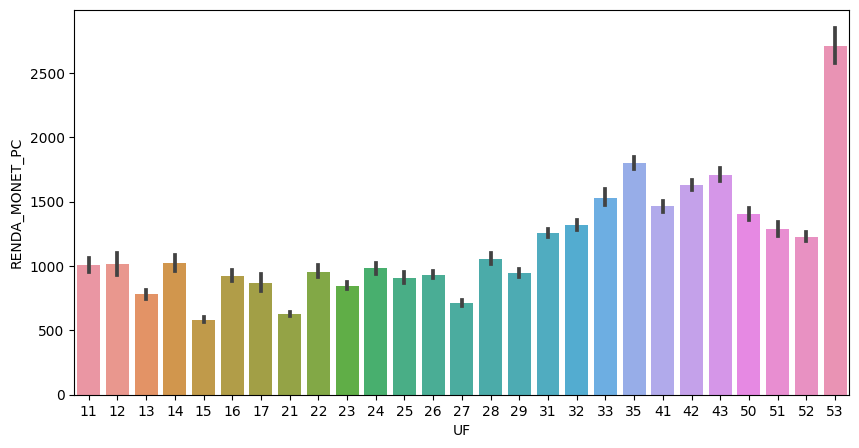

In [21]:
# analise das variaveis independentes escolhidas de cada caderno por UF

# RENDA_MONET_PC
fig, ax1 = mplt.subplots(figsize=(10,5))
sn.barplot(x = 'UF' , y = 'RENDA_MONET_PC' , data = MORADOR, ax = ax1 )
mplt.show()


In [43]:
# teste qui-quadrado das variaveis dependentes 1,2,3,4

# 'chi2_contingency' nao consegue fazer o calculo se existirem valores 'nan' na coluna
# verificando se alguma coluna de variaveis dependentes contem valores 'nan'
# precisa se fazer isso antes de transformar as variaveis dependentes em 0 e 1
var = ['var_depend1','var_depend2','var_depend3.1_inicial','var_depend3.2_inicial','var_depend3','var_depend4.1_inicial','var_depend4.2_inicial','var_depend4' ]
for i in var:
    j = base[i].unique()
    print(f'{i}:', j)


# fazendo o map
# 0 = 'não pobre '
# 1 = 'pobre '


# tabela_freq = base[['var_depend1' ,'var_depend2','var_depend3','var_depend4']]
# chi2, p_valor, gl , predict = chi2_contingency(tabela_freq)

# print(f'Estatística qui-quadrado: {chi2}', ' / ', f'p-valor: {p_valor}', ' / ', f'Graus de liberdade: {gl}' )
# print(predict)







var_depend1: ['não pobre' 'pobre']
var_depend2: ['não pobre' 'pobre']
var_depend3.1_inicial: ['não pobre' 'pobre']
var_depend3.2_inicial: ['não pobre' 'pobre']
var_depend3: ['não pobre' 'pobre']
var_depend4.1_inicial: ['pobre' 'não pobre' nan]
var_depend4.2_inicial: ['não pobre' 'pobre']
var_depend4: ['não pobre' 'pobre' nan]


In [23]:
# # transferir para excel caso nao exceda o numero de linhas
# # limite de linhas excel = 1.048.576 linhas e 16.384 colunas
# # ex: CARACTERISTICAS_DIETA.to_excel('caracteristicas_dieta.xlsx', index=False)
# # os itens de 'tabelas' e 'nome_tabelas' precisam estar alinhados

# # x
# tabelas = [ CARACTERISTICAS_DIETA,
#             CONDICOES_VIDA,
#             CONSUMO_ALIMENTAR,
#             DOMICILIO,
#             MORADOR,
#             MORADOR_QUALI_VIDA ]

# # i 
# nomes_tabelas = [   'CARACTERISTICAS_DIETA',
#                     'CONDICOES_VIDA',
#                     'CONSUMO_ALIMENTAR',
#                     'DOMICILIO',
#                     'MORADOR',
#                     'MORADOR_QUALI_VIDA' ]


# # zip serve para fazer o loop ao mesmo tempo nas minhas duas listas
# for x, i in zip(tabelas, nomes_tabelas):
    
#     if len(x) < 1048576:
#         print(f'{len(x)} , baixar: {i}')
        
#         dados = pd.DataFrame(x)
#         nome_arquivo = i +'.xlsx'
#         dados.to_excel(nome_arquivo, index=False)
        
#         print(f'arquivo {i} baixado com sucesso')
                    
#     else:
#         print(f'{len(x)} , nao baixar: {i}')
        
       
      

In [24]:
# variaveis de cada tabela
# for x , i in zip(tabelas, nomes_tabelas):
#     dados_desc = pd.DataFrame(x).describe()
#     arquivo = pd.ExcelWriter('arquivo_estatisticas_descritivas.xlsx', engine = 'xlsxwriter')
#     dados_desc.to_excel(arquivo, sheet_name='{}'.format(i), index=True)
#     arquivo.save()

In [25]:
# arquivos de dicionarios das variaveis
# diretorio_dic = r'C:\Users\Computadores Gamer\OneDrive\Área de Trabalho\dados gradilene\dados'
# diretorio_dic = diretorio_dic.replace('\\', '/')
# os.chdir(diretorio_dic)

# os.listdir()


In [26]:
# sheets do arquivo dicionario
# from openpyxl import load_workbook
# dicionario = load_workbook('dicvar1718.xlsx')
# sheets = dicionario.sheetnames
# print(sheets) 


In [27]:
# lendo sheet 'Morador' e mantendo apenas as variaveis 'V....'
# necessario generalizar esse codigo para cada sheet do arquivo


# morador = pd.read_excel('dicvar1718.xlsx', sheet_name='Morador')

# # cabecalho 
# morador.columns = morador.iloc[2,]

# # preenchendo elementos NAs da coluna 'Código da variável', senao a função 'startswith' nao funciona
# morador['Código da variável'].fillna('',inplace=True)

# # filtrar apenas linhas em que em 'Código da variável' o elemento começa com 'V'
# # lembrar que 'startswith' só funciona com o '.str'
# morador = morador[morador['Código da variável'].str.startswith('V')]        # filtrando apenas as linhas de codigos 'V....'
# print(morador)

In [28]:
# generalizando codigo de ler cada sheet e filtrar apenas os codigos das variaveis
# lista_tabelas_codigos = []

# for i in sheets:
#     caderno = pd.read_excel('dicvar1718.xlsx', sheet_name=i)
#     caderno.columns = caderno.iloc[2,]
#     caderno['Código da variável'].fillna('', inplace=True)
#     caderno = caderno[caderno['Código da variável'].str.startswith('V')]
#     lista_tabelas_codigos.append(caderno)


# codigos_site = pd.concat(lista_tabelas_codigos, axis=0)
# codigos_site = codigos_site[['Código da variável', 'Descrição']]
# print(codigos_site)


In [29]:
# vendo quantas variaveis de codigo tem em cada caderno para depois fazer o merge com a tabela 'codigos'
# lista_cadernos = [CONSUMO_ALIMENTAR, CARACTERISTICAS_DIETA, DOMICILIO, CONDICOES_VIDA, MORADOR_QUALI_VIDA , MORADOR]

# # colunas = CONSUMO_ALIMENTAR.columns.str.startswith('V')
# # CONSUMO_ALIMENTAR.columns[np.where(colunas==True)]

# codigos_total = []
# for i in lista_cadernos:
#     colunas = i.columns.str.startswith('V')
#     nome = i.columns[np.where(np.logical_and(colunas, i.columns.str.match('.*[0-9]$')))] # logical_and é pra unir as condicoes. '.*[0-9]$' é uma expressao regular
#     print(len(nome.unique()),nome)
#     codigos_total.extend(nome) # coloca na lista, parecido com append, porem append é para adicionar um unico elemento no final da lista, o extend ja adiciona tudo de uma vez
    
    
# codigos_cadernos = pd.DataFrame({'codigo':codigos_total})
# codigos_cadernos.columns = ['Código da variável']
# # codigos_cadernos.to_excel('codigos_cadernos.xlsx', index=False)

    

In [30]:
# fazendo merge dos codigos que achei com os 207 codigos que sao o total de codigos de todos cadernos
# codigos_final = pd.merge(codigos_site, codigos_cadernos, on='Código da variável', how = 'outer')
# codigos_final = codigos_final[['Código da variável','Descrição']]
# print(codigos_final)

# codigos_final.to_excel('codigos_final.xlsx', index=False)